# Preliminary notebook - Data Exploration
In this notebook I will be exploring the datasets (training data), to look for observations

In [53]:
# Funny colors and images
class bcolors:
    HEADER = '\033[95m'
    OKBLUE = '\033[94m'
    OKCYAN = '\033[96m'
    OKGREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
from IPython.display import Image


In [2]:
# Pandas, NumPy import and version
import pandas as pd
import numpy as np
print(f"Modules imported.\n Pandas: {pd.__version__}\n Numpy: {np.__version__}")

Modules imported.
 Pandas: 2.2.2
 Numpy: 1.26.4


In [4]:
# Data loading
path = r"../data/"
df = pd.read_csv(path+"obesity_train.csv")
df.head(5)

,id,age,alcohol_freq,caloric_freq,devices_perday,eat_between_meals,gender,height,marrital_status,meals_perday,...,parent_overweight,physical_activity_perweek,region,siblings,smoke,transportation,veggies_freq,water_daily,weight,obese_level
0,1,21.0,Never,no,up to 5,Sometimes,Female,1.62,NaN,3.0,...,yes,NaN,LatAm,3.0,no,Public,Sometimes,1 to 2,64.0,Normal_Weight
1,2,23.0,Frequently,no,up to 5,Sometimes,Male,1.80,NaN,3.0,...,yes,3 to 4,LatAm,0.0,no,Public,Sometimes,1 to 2,77.0,Normal_Weight
2,3,NaN,Frequently,no,up to 2,Sometimes,Male,1.80,NaN,3.0,...,no,3 to 4,LatAm,2.0,no,Walk,Always,1 to 2,87.0,Overweight_Level_I
3,4,22.0,Sometimes,no,up to 2,Sometimes,Male,1.78,NaN,1.0,...,no,NaN,LatAm,3.0,no,Public,Sometimes,1 to 2,90.0,Overweight_Level_II
4,5,22.0,Sometimes,no,up to 2,Sometimes,Male,1.64,NaN,3.0,...,no,5 or more,LatAm,3.0,no,Public,Sometimes,1 to 2,53.0,Normal_Weight


In [23]:
# Data exploration
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1611 entries, 0 to 1610
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         1611 non-null   int64  
 1   age                        1545 non-null   float64
 2   alcohol_freq               1575 non-null   object 
 3   caloric_freq               1591 non-null   object 
 4   devices_perday             1589 non-null   object 
 5   eat_between_meals          1552 non-null   object 
 6   gender                     1591 non-null   object 
 7   height                     1597 non-null   float64
 8   marrital_status            0 non-null      float64
 9   meals_perday               1602 non-null   float64
 10  monitor_calories           1572 non-null   object 
 11  parent_overweight          1591 non-null   object 
 12  physical_activity_perweek  1046 non-null   object 
 13  region                     1544 non-null   objec

**OBSERVATION A.** We immediately notice that we have *missing values*. In particular, `marital_status` is always null. For this reason, the column `marital_status` is to be dropped.

**OBSERVATION B.** Also, we have too many columns which leads us to the *curse of dimensionality*. Feature selection or engineering is to be considered.


In [51]:
# Count percentage of missing data for each column
missing_hash = {}
total = df.shape[0]
for col in df.columns.tolist():
    missing = df[col].isnull().sum()
    # print(f"Column {col} has {bcolors.FAIL}{bcolors.BOLD}{(missing/total*100).round(2)}%{bcolors.ENDC} of missing data")
    missing_hash[col] = missing/total*100


missing_s = pd.Series(missing_hash)
missing_s.sort_values(ascending=False)

marrital_status              100.000000
physical_activity_perweek     35.071384
region                         4.158908
age                            4.096834
eat_between_meals              3.662322
weight                         3.289882
transportation                 2.482930
monitor_calories               2.420857
alcohol_freq                   2.234637
water_daily                    2.110490
veggies_freq                   1.613904
devices_perday                 1.365611
parent_overweight              1.241465
gender                         1.241465
caloric_freq                   1.241465
height                         0.869025
siblings                       0.744879
smoke                          0.744879
meals_perday                   0.558659
id                             0.000000
obese_level                    0.000000
dtype: float64

**OBSERVATION C.** Excluding `marital_status`, we have `physical_activity_perweek` with a significant percentage of missing data ($\sim 35\%$). However, as this column might be relevant for our project, it will not be dropped and instead we will attempt to fill it with an algorithm (such as K-means)

# Visualization
Now, with Excel (as we don't know how to use matplotlib yet), we will create some data visualizations to get a clearer idea of data. In particular, we're going to focus on quantitative data.

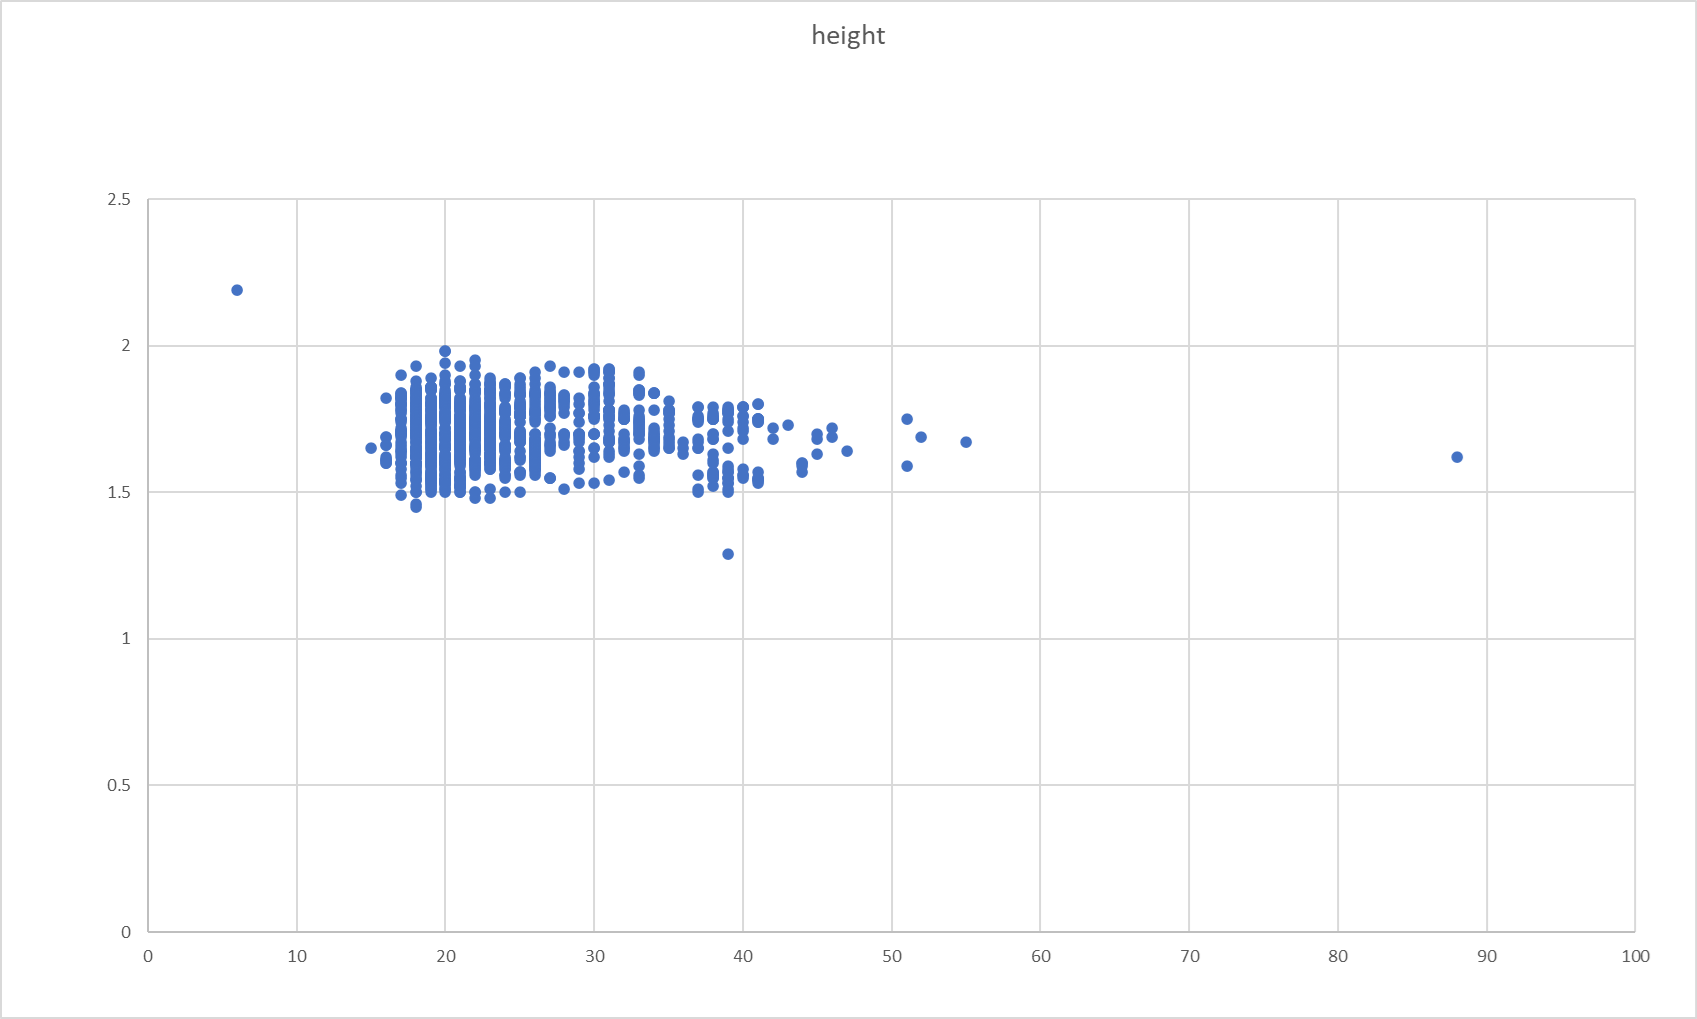

In [55]:
# 1. Age x Height
Image(r"..\images\ageheight_1.png")

**OBSERVATION D.** We have clear potentials for multidimensional outliers, such as 7-year ols kids tall as 2.3 meters. As normal outliers, we only have a $<10$-year old, $>85$-year old and people shorter than $1.5$ meters. To detect our multidimensional outliers better, we will use Kmeans.

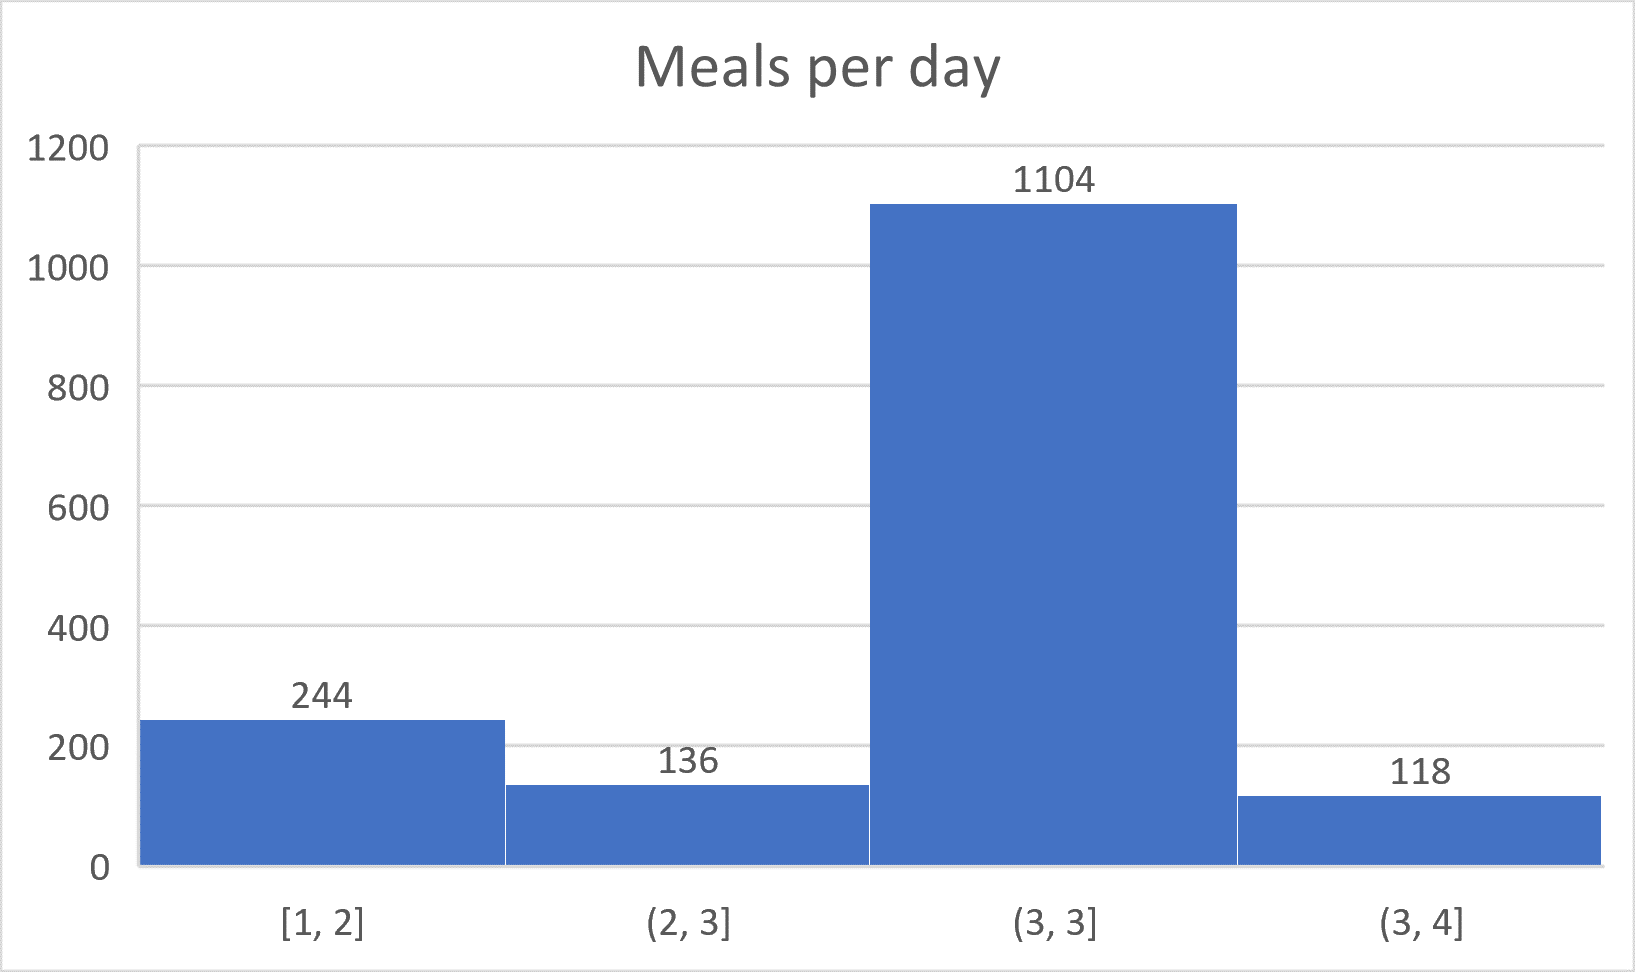

In [56]:
Image(r"../images/avg_meal_1.png")

**OBSERVATION E.** It seems to be centered around $\mu=3$, in particular we have

In [60]:
df.meals_perday.describe()

count    1602.000000
mean        2.684145
std         0.817584
min         1.000000
25%         3.000000
50%         3.000000
75%         3.000000
max         4.000000
Name: meals_perday, dtype: float64

This means we can treat people with 1 or 4 meals a day as outliers.

# OTHER IDEAS
- Look at how categorical (boolean) data affect the data variable, such as eating in between meals, etc...
- How to treat outliers?
- How to fill missing data? If KNN, basing on which other columns?
  